<a href="https://colab.research.google.com/github/JOHN-AMAO/Classification-model-car-vs-bike-/blob/main/Car_Bike_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Installing libraries***

In [2]:
!pip install -Uqq fastai duckduckgo_search

**Function to get image urls`**

In [14]:
from duckduckgo_search import DDGS
from fastcore.all import *

def search_images(term, max_images=30):
  print(f"searching for '{term}'")
  ddgs = DDGS()
  search_result = ddgs.images(keywords=term)
  image_urls = [result.get("image") for result in search_result[:max_images]]
  return (image_urls)
urls = search_images("car images", max_images=10)
print(urls[1])


searching for 'car images'
https://images.pexels.com/photos/170811/pexels-photo-170811.jpeg?cs=srgb&dl=road-car-vehicle-170811.jpg&fm=jpg


In [15]:
urls = search_images("bike images", max_images=10)
print(urls[0])

searching for 'bike images'
https://wallpapercave.com/wp/wp1878438.jpg


**Downloading the images and resizing**

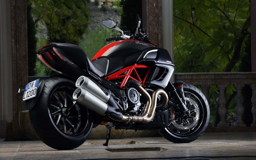

In [32]:
from fastdownload import download_url
dest = "bike.jpg"
download_url(urls[5], dest)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256, 256)

**saving images in a file**

In [34]:
searches = "car", "bike"
path = Path("data")
from time import sleep

for o in searches:
  dest = (path/o)
  dest.mkdir(exist_ok=True, parents="True")
  download_images(dest, urls=search_images(f'{o} photo'))
  sleep(10)
  download_images(dest, urls=search_images(f'{o} sun photo'))
  sleep(10)
  download_images(dest, urls=search_images(f'{o} shade photo'))
  sleep(10)
  resize_images(path/o, max_size=400, dest=path/o)



searching for 'car photo'
searching for 'car sun photo'
searching for 'car shade photo'
searching for 'bike photo'
searching for 'bike sun photo'
searching for 'bike shade photo'


**Train Model**

In [23]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

2

Train test Spilt

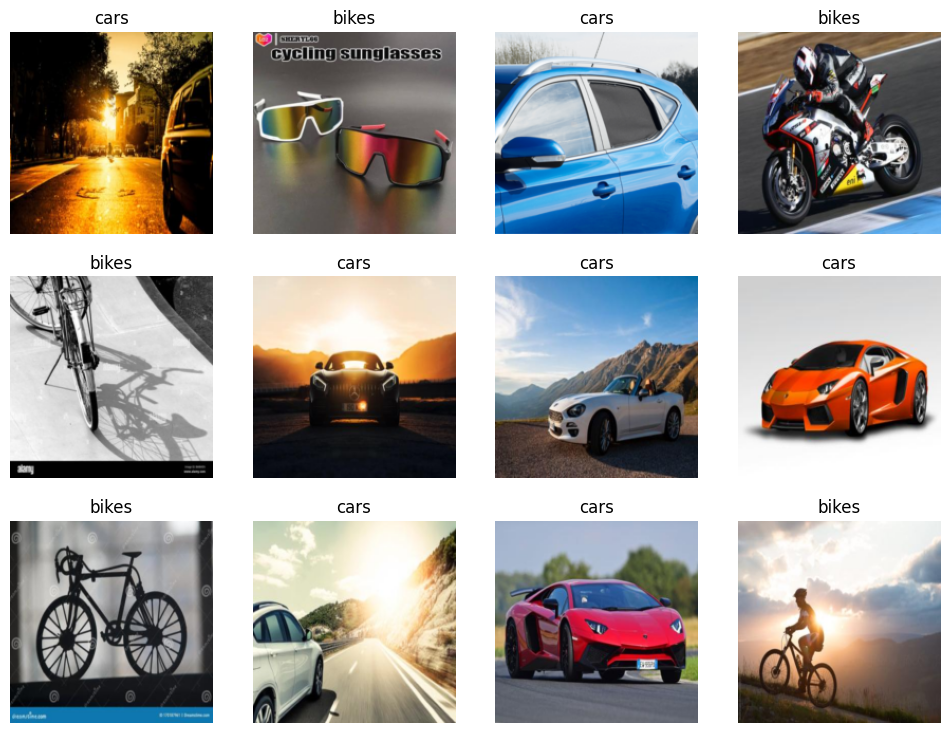

In [25]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=12)

**Train Model**

In [26]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 136MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.985209,0.095271,0.030303,00:23


epoch,train_loss,valid_loss,error_rate,time
0,0.203829,0.062186,0.000000,00:34
1,0.150055,0.043362,0.000000,00:33
2,0.123855,0.023235,0.000000,00:39


**Prediction**

In [36]:
is_bike,_,probs = learn.predict(PILImage.create('bike.jpg'))
print(f"This is under catergoty: {is_bike}.")
print(f"Probability it's a bike: {probs[0]:.4f}")

This is under catergoty: bikes.
Probability it's a bike: 0.9681
